# Assignment 11 

## Instructions

1. Download last_first_assignment11.ipynb. Fill in the code where indicated to complete the assignment. Feel free to add more cells than provided to try things out, and check what your variables look like, to see if you got the right results. Just make sure you have done what is asked for that question and that you don't delete any code we provide you with. 

2. Rename this `last_first_assignment11.ipynb` file replacing `last` and `first` with your name. Make sure all the outputs are there (run each cell) and then export as `last_first_assignment11.py` as well.

3. Submit both these files to Quercus.

## Questions and Support
1. Please ask class content questions on the class GitHub page: 
https://github.com/BME1478H/Winter2020class/ Expect a processing time of 1d for us to respond. As such, we cannot guarantee we can address your questions and work through all the troubleshooting in time if you ask them the night before or the day of the assignment deadline. Please plan accordingly. 
2. If there are sensitive questions, submit to BME1478h.ta.team@gmail.com. 

___
In this assignment, we will go through a start-to-finish analysis of a dataset which involves exploring the data, testing some hypothesis and making predictions based on patterns in our data. We have created a modified gapminder dataset with some of the same columns we've seen before, and some new ones. 

To start the assignment, run the next cell.

In [19]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/final-assignment-gapminder.csv'
world_data = pd.read_csv(url)

# take a look at the data
world_data.describe()

,year,population,life_expectancy,income,children_per_woman,pop_density,years_in_school_men,years_in_school_women,bp_men,bp_women,sugar_intake_daily
count,11288.000000,1.128800e+04,11288.000000,11288.000000,11288.000000,11288.000000,7636.000000,7636.000000,4785.000000,4785.000000,7150.000000
mean,1984.500000,2.880411e+07,63.437739,11268.292169,4.236699,122.985716,7.724671,7.047937,130.884848,127.503866,78.291337
std,19.628656,1.109598e+08,11.248930,16053.435041,2.043470,396.408069,3.217634,3.893914,4.159285,4.397432,54.137389
min,1951.000000,2.750000e+04,12.600000,247.000000,1.120000,0.511000,0.900000,0.210000,119.000000,110.000000,0.090000
25%,1967.750000,1.770000e+06,55.175000,2040.000000,2.280000,15.000000,5.180000,3.740000,128.000000,124.000000,36.500000
50%,1984.500000,5.295000e+06,65.500000,5445.000000,4.035000,46.850000,7.710000,7.100000,131.000000,128.000000,79.700000
75%,2001.250000,1.540000e+07,72.200000,13525.000000,6.220000,110.000000,10.200000,10.100000,134.000000,131.000000,112.000000
max,2018.000000,1.420000e+09,84.200000,178000.000000,8.460000,8270.000000,15.300000,15.700000,143.000000,140.000000,1410.000000


## 1. Explore the data (1.5 marks)

Notice that there are some new columns we haven't seen before. Here is some more information about them:

- "bp_men" and "bp_women" are the average blood pressure in mmhg for men and women, respectively
- "sugar_intake_daily" is the average sugar intake in grams per person per day

To look more closely at the new columns, and how they may relate to `life_expectancy`, we can focus on the data from one year, so there is less noise in our data.
___

a. Create a subset of `world_data` called `wd_2005` keeping only rows where the year is 2005. **(0.25 marks)**

b. Create a pairplot of `wd_2005`, but unlike plotting every pair-wise comparison, we only want to plot some columns against the `life_expectancy` column. To do this, use the `sns.pairplot()` function but also set the `y_vars='life_expectancy'` and `x_vars=['income', 'children_per_woman', 'sugar_intake_daily', 'bp_men', 'bp_women']`. **(0.25 marks)**

In [2]:
wd_2005 = world_data.loc[world_data.year==2005]

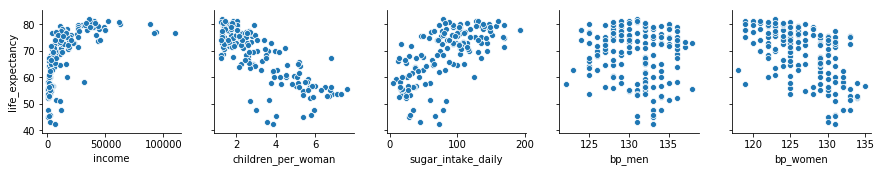

In [3]:
# create your plot here
sns.pairplot(wd_2005, 
             x_vars=['income', 'children_per_woman', 'sugar_intake_daily', 'bp_men', 'bp_women'],
             y_vars='life_expectancy'
             )

In the pairplot, we see there does indeed seem to be some relationship between `life_expectancy`, and `income` and `children_per_woman` as we have seen before, but also with `sugar_intake_daiy`, and `bp_women`.

However, it may be counter-intuitive that more sugar intake (which is often associated with increased obesity, diabetes and other co-morbidities) would positively correlate with longer life expectancies. However, it could be that a nation's sugar intake may be highly correlated with it's economic status, more income and resources food in general may be the main driver of this effect.

c. Fill the rest of the code to plot: **(0.75 marks)**

A scatterplot with `sugar_intake_daily` on the x-axis, and `income` on the `y-axis` while facetting the `hue` by `income_group`.

A violinplot with `income_group` on the x-axis and `sugar_intake_daily` on the y-axis and setting `order=['Low', 'Lower middle', 'Upper middle', 'High']` so that the groups are shown in an order that makes sense to us.

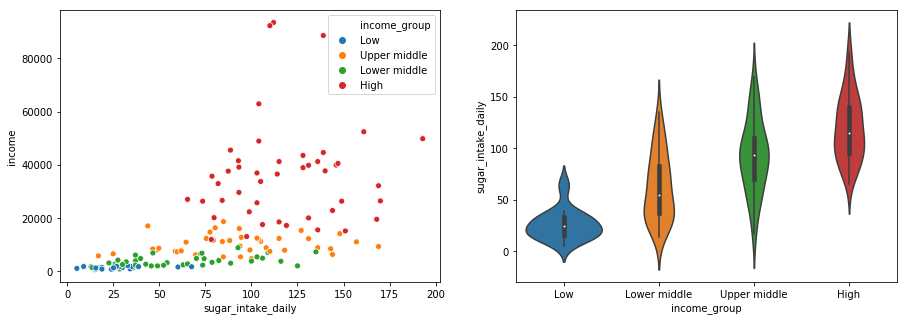

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot("sugar_intake_daily", "income", hue='income_group', data=wd_2005, ax=ax1)
sns.violinplot("income_group", "sugar_intake_daily", order=['Low', 'Lower middle', 'Upper middle', 'High'], data=wd_2005, ax=ax2)


Indeed, we do see that there does seem to be a relationship between sugar intake and a nation's GDP, but there is a lot of variability within each group, suggesting income is not the only factor influencing sugar intake. 

## 2. Tests of association in our data (1.5 marks)

First, we want to check for multicollinearity in our data. This is when two or more variables are highly correlated. We can do this using the built-in `corr()` function for dataframes in `pandas`. Run the code below to take a look (you do not need to code anything here).

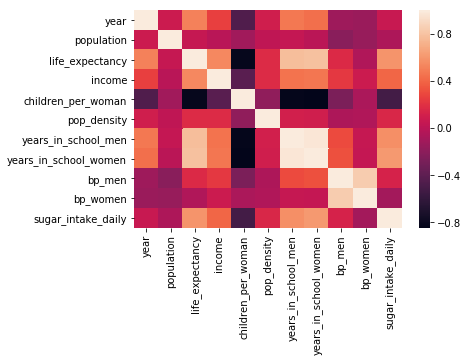

In [5]:
corr = world_data.corr()
sns.heatmap(corr)

We see that the pairs `bp_women` and `bp_men`, and `years_in_school_men` and `years_in_school_women` are highly correlated which makes sense as they are the same indicators but in different genders. To avoid **multicollinearity**, we can either drop one (such as dropping the `bp_men` column), or combine these into a single value (such as creating a new column that has the gender ratio of years in school). 

___

a. Create a new column in `world_data` called `education_gender_ratio` that divides `years_in_school_women` by `years_in_school_men`. **(0.25 marks)**

b. Then, drop the three columns `bp_men`, `years_in_school_women` and `years_in_school_men` using the `drop()` function. Save the new dataframe in a variable called `new_world_data`. **(0.25 marks)**

Here is an example of how to use it:

`dataframe_2 = dataframe.drop(columns=[columnname1, columnname2, columname3])`. 

You can answer both (a) and (b) in the next cell.


In [6]:
world_data['education_gender_ratio'] = world_data['years_in_school_women']/world_data['years_in_school_men']

new_world_data = world_data.drop(columns=['years_in_school_women', 'years_in_school_men', 'bp_men'])

# keep this code here
print(new_world_data.columns)

Index(['country', 'year', 'population', 'region', 'sub_region', 'income_group',
       'life_expectancy', 'income', 'children_per_woman', 'pop_density',
       'bp_women', 'sugar_intake_daily', 'education_gender_ratio'],
      dtype='object')


We can create a model of our data using a linear regression and the factors that we think might be important. For example, we may be interested in whether how well parity between women's education and men's education may impact the health of a nation. 

c. Use `smf.ols()` (which uses formula notation) to create a model and fit it to model `life_expectancy` as a function of `education_gender_ratio`. You can append `.fit()` to the end of the model to fit it in the same line and get the results and store it in a variable called `results`. **(0.5 marks)**


In [7]:
import statsmodels.formula.api as smf # keep this line here

results = smf.ols('life_expectancy ~ education_gender_ratio', new_world_data).fit()

# keep this code here
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     7809.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:50:17   Log-Likelihood:                -25554.
No. Observations:                7636   AIC:                         5.111e+04
Df Residuals:                    7634   BIC:                         5.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 40

We can plot our model's fit against the actual data. However, not all rows have an `education_ratio_gender` value. You can run `new_world_data.info()` for yourself to see that there are only 7636 non null values, out of a possible 11288 values. We need to make a clean subset of our data without any NA values, otherwise, there will be a descrepancy between the array of the predicted results, and values we do have in our actual data. 

We created a new subset called `education_clean` from `new_world_data` using the `dataframe.dropna()` method. YThe argument `subset=['education_gender_ratio']` in `dropna()` is used to specifically drop rows only where the `education_gender_ratio` value is null. 

In [8]:
education_clean = new_world_data.dropna(subset=['education_gender_ratio'])

d. Using `education_clean`, create two scatterplots with `education_gender_ratio` on the x-axis, and `life_expectancy` on the y-axis. However, Oone should plot the *actual* life expectancy in `education_clean` and the second should use the values in `results.predict()`. **(0.5 marks)**

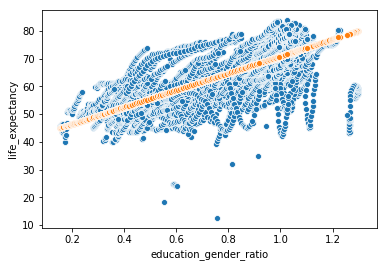

In [10]:
sns.scatterplot('education_gender_ratio', 'life_expectancy', data=education_clean)
sns.scatterplot(education_clean.education_gender_ratio, results.predict())

## 3. Pre-processing our data ahead of any machine learning (2 marks)

To determine whether we are able to predict a nation's life expectancy using other indicators, we are going to build a decision tree regressor using `scikit-learn`. The first step is to preprocess our data and get it in the right format for `scikit-learn`.

We should think about which columns will contain information in our dataset. We can drop `country`, `sub_region` which may be too specific for our model to find overarching patterns with limited data, and `income_group` as this information is available in a different form, represented in the `income` column.

a. Create a new variable called `df` using `new_world_data` where we drop the columns 'country', 'sub_region', and 'income_group'. Also append `.dropna(how=any, axis=0)` to this line of code to clean our data and remove rows which have a null value in *any* of the columns. **(0.5 marks)**

The structure will look something like: `dataframe.drop().dropna()` with the correct variable name and the necessary parameters filled in.

In [21]:
df = new_world_data.drop(columns=["country", "sub_region", "income_group"]).dropna(how='any',axis=0)

# keep this code here
df.head()

,year,population,region,life_expectancy,income,children_per_woman,pop_density,bp_women,sugar_intake_daily,education_gender_ratio
29,1980,13200000,Asia,43.3,1170,7.45,20.3,122.0,20.2,0.164773
30,1981,13100000,Asia,44.1,1300,7.45,20.0,122.0,16.7,0.166667
31,1982,12700000,Asia,43.8,1410,7.45,19.5,123.0,20.2,0.172973
32,1983,12400000,Asia,42.0,1470,7.45,19.0,123.0,25.1,0.173684
33,1984,12000000,Asia,39.8,1440,7.46,18.5,123.0,23.8,0.174359


We now want to create our X (features) and Y (target) variables that our model will train on. Our model will use the features in X to try to generate an accurate prediction of the target value in Y. 

b. Create a variable `Y` which only has the column `life_expectancy` from the `df` dataframe. **(0.25 marks)**

c. Create a variable `X` which drops the `life_expectancy` column from the `df` dataframe. **(0.25 marks)**

In [12]:
Y = df.life_expectancy
X = df.drop(["life_expectancy"],axis=1)


# Keep this code here
# this performs the one-hot encoding of the categorical variables. 
X = pd.get_dummies(X, drop_first=True)
X.head()

,year,population,income,children_per_woman,pop_density,bp_women,sugar_intake_daily,education_gender_ratio,region_Americas,region_Asia,region_Europe,region_Oceania
29,1980,13200000,1170,7.45,20.3,122.0,20.2,0.164773,0,1,0,0
30,1981,13100000,1300,7.45,20.0,122.0,16.7,0.166667,0,1,0,0
31,1982,12700000,1410,7.45,19.5,123.0,20.2,0.172973,0,1,0,0
32,1983,12400000,1470,7.45,19.0,123.0,25.1,0.173684,0,1,0,0
33,1984,12000000,1440,7.46,18.5,123.0,23.8,0.174359,0,1,0,0


Typically, you will need to scale/normalize your data such it is unit invariant. The values in each column are scaled by the mean and standard deviation of the column. It is not uncommon for a machine learning algorithm to expect data to be centered around 0, and/or be approximately normally distributed. It is not as important for decision trees, but can still provide some benefits. 

c. Import `StandardScaler` from the `sklearn.preprocessing` module. Create an instance of the `StandardScaler()` called `scaler`. (**0.5 marks)**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# keep this code here, this fits the scaler and transforms our data
scaler.fit(X)
X_scaled = scaler.transform(X)

d. Split our features (`X_scaled`) and targets (`Y`) into a training set and a test set using `train_test_split`. **(0.5 marks)**
- Set `test_size=0.2` (20% of our data is set aside for testing)
- Set `random_state=0` so that the result is reproducible (there is some randomness involved in these models). 
- the output is four different arrays in the following order:
    1. X_train (the feature training set)
    2. X_test (the feature test set)
    3. Y_train (the target training set)
    4. Y_test (the target test set)

In [14]:
from sklearn.model_selection import train_test_split # keep this here

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

# keep this code here
# confirm the size of the train set and test set make sense
print(X_train.shape, X_test.shape)

(3217, 12) (805, 12)


## Training and evaluating a decision tree regressor (1.25 marks)
Now that we have prepared our data, we can instantiate and train our model. 

The typical `scikit-learn` workflow is:
1. Define an instance of the model of choice, for example, `model = LinearRegression(random_state=0)`
2. Fit `model` on our training features and target data like `model.fit(X_train, Y_train)`
3. Use the fitted model to make predictions on our test feature set like `preds = model.predict(X_test)`
4. Score the performance of our model's predictions against the known target values like `model.score(X_test, Y_test)`  which is built into the model and scores the correlation, 
5. OR use our own function to score the difference between predictions and targets like `custom_scoring_function(preds, Y_test)`
___

a. Instantiate a `DecisionTreeRegressor` called `tree_model` with a `random_state=0`. **(0.25 marks)**   
b. Fit `tree_model` on the training data (features and targets). **(0.25 marks)**  
c. Use the fitted `tree_model` to predict the `life_expectancy` based on the features in the test set (`X_test`) and store in `Y_pred`. **(0.25 marks)**

In [15]:
from sklearn.tree import DecisionTreeRegressor

# create an instance of the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=0)

# fit the model
tree_model.fit(X_train, Y_train)

# predictions
Y_pred = tree_model.predict(X_test)

d. To see how well our model performed, use the `DecisionTreeRegressor`'s built-in `score()` function to see the correlation between the actual and predicted life expectancy values. **(0.25 marks)**

In [16]:
corr_tree = tree_model.score(X_test, Y_test)

# keep this code here
print(corr_tree)

0.9563752386148535


e. Plot a scatterplot using the `tree_model` predicted `life_expectancy` values we already stored in `Y_pred` for the x-axis, versus the actual values in `Y_test` on the y-axis. **(0.25 marks)**

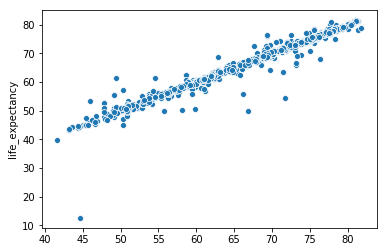

In [17]:
sns.scatterplot(Y_pred, Y_test)

Congratulations, you're done! The next bit is just for educational purposes. Read on to see the **feature importances** for our model. 
___
If we wanted to learn more about how our model works, decision trees have a nice function that allows us to see the feature importances, telling us which features were most informative in deriving the predicted value. 

Run the next cell to see the relative importance of each feature for the decision tree regressor. Do they make sense based on what we've already observed?

In [18]:
sorted_indices = tree_model.feature_importances_.argsort() # argsort() sorts the values from lowest to highest and returns the indices

# we can use those sorted_indices to reorder our columns and tell us which columns were most important
# the [::-1] reverses the order so it goes high to low instead
X.columns[sorted_indices][::-1] 

Index(['children_per_woman', 'income', 'sugar_intake_daily',
       'education_gender_ratio', 'pop_density', 'bp_women', 'population',
       'year', 'region_Asia', 'region_Oceania', 'region_Americas',
       'region_Europe'],
      dtype='object')